In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import pmdarima as pm

/Users/jingyiliu/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


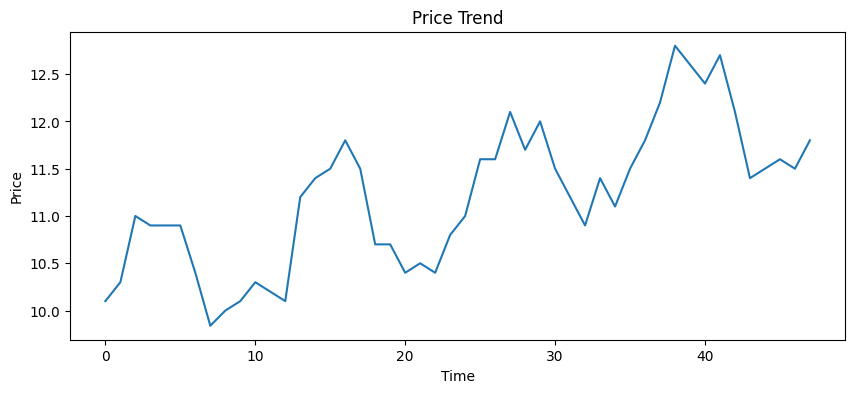

          Prices
count  48.000000
mean   11.207083
std     0.757897
min     9.840000
25%    10.650000
50%    11.300000
75%    11.625000
max    12.800000


In [16]:
# Import the csv file located in the same directory
DATA = pd.read_csv("Nat_gas.csv")

# Plotting the "Prices" on the first subplot
plt.figure(figsize=(10, 4))  # Set the size of the plot
plt.plot(DATA["Prices"])  # Plotting the data
plt.title('Price Trend')  # Title of the plot
plt.xlabel('Time')  # Label for the x-axis
plt.ylabel('Price')  # Label for the y-axis
tick_spacing = 10  # Change this value to adjust the sparsity of ticks
plt.xticks(range(0, len(DATA["Prices"]), tick_spacing))  # Set ticks at every 10th point
plt.show()

# general description
description = DATA.describe()
print(description)

In [3]:
print("DataFrame Structure:")
print(DATA.head())

DataFrame Structure:
      Dates  Prices
0  10/31/20    10.1
1  11/30/20    10.3
2  12/31/20    11.0
3   1/31/21    10.9
4   2/28/21    10.9


Seasonal data with trends. Use SARIMA.

/var/folders/4l/lfc9q99n20l79k6bq92bzxh80000gn/T/ipykernel_67971/864024242.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  DATA = pd.read_csv("Nat_gas.csv", parse_dates=['Dates'], index_col='Dates')


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=37.874, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=48.334, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=38.394, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=42.336, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=46.741, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=39.692, Time=0.54 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=39.478, Time=0.67 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=38.758, Time=0.55 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=36.102, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=53.197, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=53.566, Time=0.04 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=53.701, Time=0.07 sec
 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=53.674, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=51.953,

/var/folders/4l/lfc9q99n20l79k6bq92bzxh80000gn/T/ipykernel_67971/864024242.py:13: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  in_sample_forecast[0] = DATA.Prices.iloc[0]


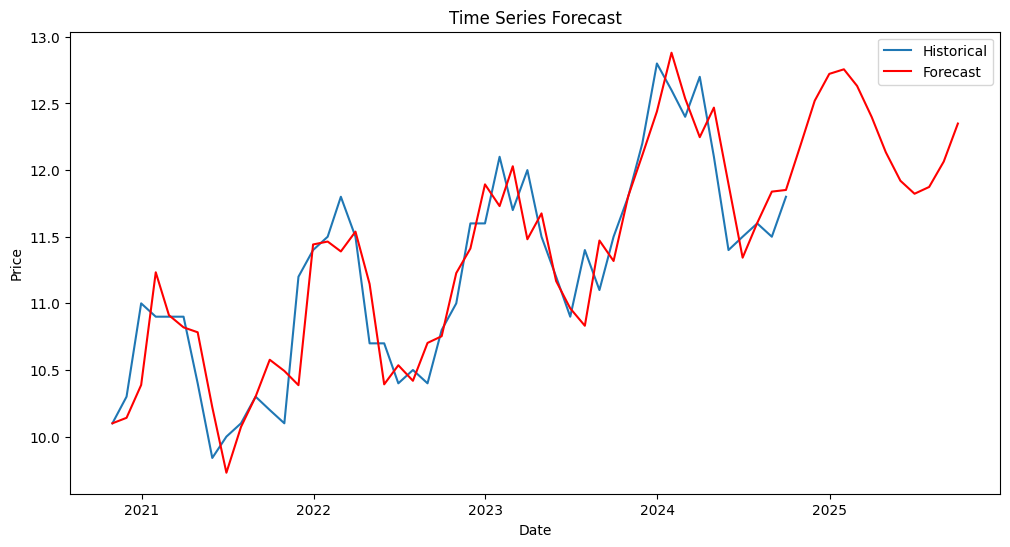

In [10]:
# Load data
DATA = pd.read_csv("Nat_gas.csv", parse_dates=['Dates'], index_col='Dates')

# Fit a seasonal ARIMA model
model = pm.auto_arima(DATA.Prices, seasonal=True, m=12, trace=True,
                      error_action='ignore', suppress_warnings=True)

# Forecasting the next one year, 12 months
forecast_price = model.predict(n_periods=12)

# In-sample forecast
in_sample_forecast = model.predict_in_sample()
in_sample_forecast[0] = DATA.Prices.iloc[0]

# Combine in-sample and out-of-sample forecasts
fulltime_forecast = pd.concat([
    pd.Series(in_sample_forecast, index=DATA.index),
    pd.Series(forecast_price, index=pd.date_range(start=DATA.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'))
])

# Plotting the complete forecast
plt.figure(figsize=(12, 6))
plt.plot(DATA.index, DATA.Prices, label='Historical')
plt.plot(fulltime_forecast.index, fulltime_forecast, label='Forecast', color='red')
plt.title('Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Predict price at any given date

In [11]:
# Function to fetch the price for a given date
def get_price_for_date(query_date):
    # Convert query_date to datetime if it's a string
    if isinstance(query_date, str):
        query_date = pd.to_datetime(query_date)
    
    # Check if the date is in the index
    if query_date in fulltime_forecast.index:
        return fulltime_forecast.loc[query_date]
    else:
        return "Date is out of range. Available dates are from {} to {}.".format(DATA.index[0], full_forecast.index[-1])

# Example usage
input_date = '8/31/2023'
price = get_price_for_date(input_date)
print(f"The price on {input_date} is: {price}")

The price on 8/31/2023 is: 11.471556759198736


LSTM (perform worse than sarima for this case)

Epoch 1/20


/var/folders/4l/lfc9q99n20l79k6bq92bzxh80000gn/T/ipykernel_67971/9914198.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  DATA = pd.read_csv("Nat_gas.csv", parse_dates=['Dates'], index_col='Dates')
/Users/jingyiliu/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3954  
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2952 
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2212 
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1516 
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0848 
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0451 
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0468 
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0730 
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0702 
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0502 
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0399 
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0391 
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0413 
Epoch 14/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0419 
Epoch 15/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0447 
Epoch 16/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

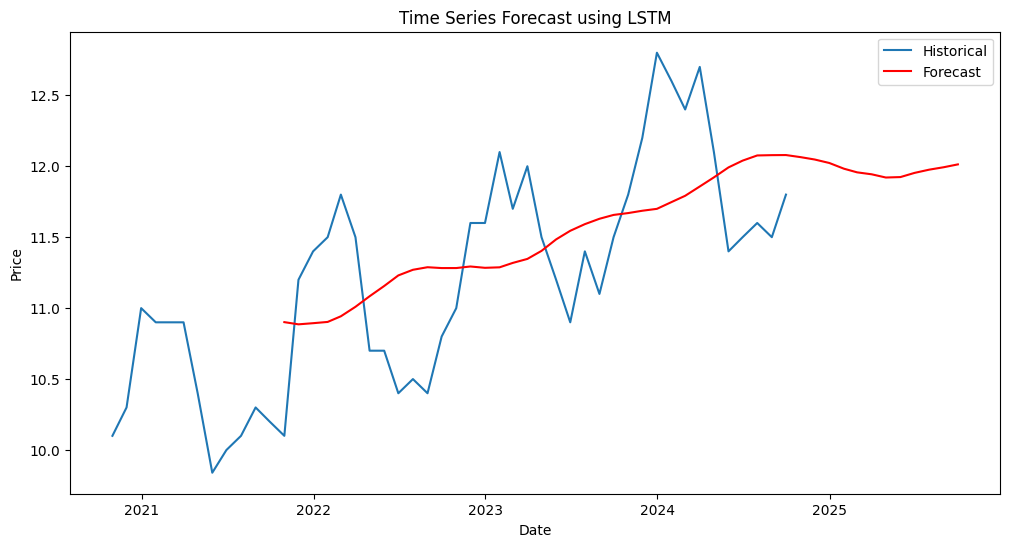

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load data
DATA = pd.read_csv("Nat_gas.csv", parse_dates=['Dates'], index_col='Dates')

# Preprocessing the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(DATA[['Prices']])

# Prepare the dataset for LSTM
sequence_length = 12
X, y = [], []
for i in range(sequence_length, len(data_scaled)):
    X.append(data_scaled[i-sequence_length:i, 0])
    y.append(data_scaled[i, 0])
X, y = np.array(X), np.array(y)

# Reshape X to be 3-dimensional (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=20, batch_size=32)

# Forecasting the next one year, 12 months
last_sequence = data_scaled[-sequence_length:]
last_sequence = np.reshape(last_sequence, (1, sequence_length, 1))
forecast_price_scaled = []
for _ in range(12):
    forecast = model.predict(last_sequence)
    forecast_price_scaled.append(forecast[0, 0])
    last_sequence = np.append(last_sequence[:, 1:, :], [[forecast[0]]], axis=1)

# Inverse transform the forecasted values
forecast_price = scaler.inverse_transform(np.array(forecast_price_scaled).reshape(-1, 1))

# Combine in-sample and out-of-sample forecasts
in_sample_forecast = model.predict(X)
in_sample_forecast = scaler.inverse_transform(in_sample_forecast)
fulltime_forecast = pd.concat([
    pd.Series(in_sample_forecast.flatten(), index=DATA.index[sequence_length:]),
    pd.Series(forecast_price.flatten(), index=pd.date_range(start=DATA.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'))
])

# Plotting the complete forecast
plt.figure(figsize=(12, 6))
plt.plot(DATA.index, DATA.Prices, label='Historical')
plt.plot(fulltime_forecast.index, fulltime_forecast, label='Forecast', color='red')
plt.title('Time Series Forecast using LSTM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Epoch 1/50


/var/folders/4l/lfc9q99n20l79k6bq92bzxh80000gn/T/ipykernel_67971/1960889296.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  DATA = pd.read_csv("Nat_gas.csv", parse_dates=['Dates'], index_col='Dates')
/Users/jingyiliu/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.4462 - val_loss: 0.1578
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.3091 - val_loss: 0.0544
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1985 - val_loss: 0.0027
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0980 - val_loss: 0.0469
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0424 - val_loss: 0.2763
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0399 - val_loss: 0.4882
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0897 - val_loss: 0.4279
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0767 - val_loss: 0.2780
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0531 - val_loss: 0.1489
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0272 - val_loss: 0.0751
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0289 - val_loss: 0.0375
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0354 - val_loss: 0.0212
Epoch 13/50
1/

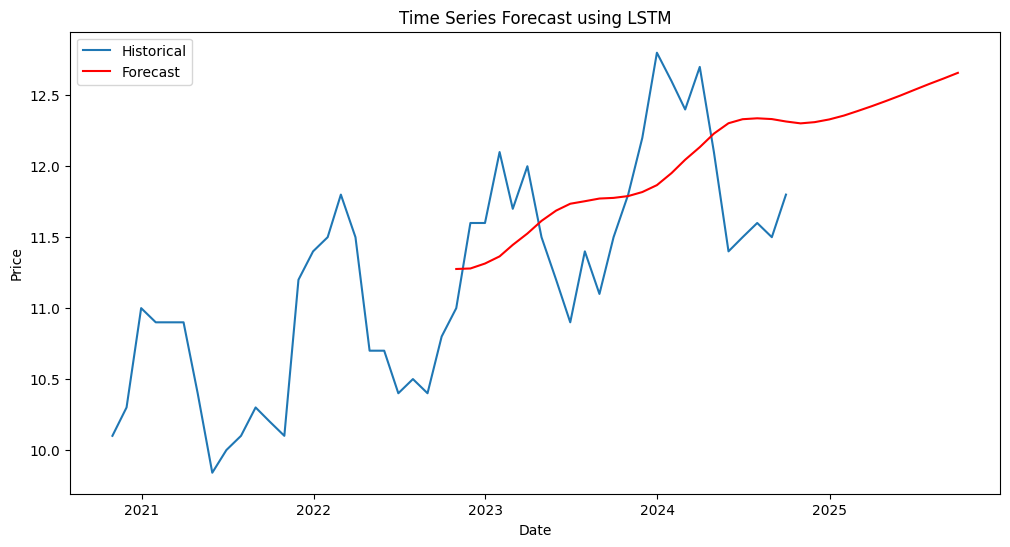

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load data
DATA = pd.read_csv("Nat_gas.csv", parse_dates=['Dates'], index_col='Dates')

# Preprocessing the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(DATA[['Prices']])

# Prepare the dataset for LSTM
sequence_length = 24  # Increase sequence length to capture more historical context
X, y = [], []
for i in range(sequence_length, len(data_scaled)):
    X.append(data_scaled[i-sequence_length:i, 0])
    y.append(data_scaled[i, 0])
X, y = np.array(X), np.array(y)

# Reshape X to be 3-dimensional (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build LSTM model with additional dropout layers
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)  # Adding validation split

# Forecasting the next one year, 12 months
last_sequence = data_scaled[-sequence_length:]
last_sequence = np.reshape(last_sequence, (1, sequence_length, 1))
forecast_price_scaled = []
for _ in range(12):
    forecast = model.predict(last_sequence)
    forecast_price_scaled.append(forecast[0, 0])
    last_sequence = np.append(last_sequence[:, 1:, :], [[forecast[0]]], axis=1)

# Inverse transform the forecasted values
forecast_price = scaler.inverse_transform(np.array(forecast_price_scaled).reshape(-1, 1))

# Combine in-sample and out-of-sample forecasts
in_sample_forecast = model.predict(X)
in_sample_forecast = scaler.inverse_transform(in_sample_forecast)
fulltime_forecast = pd.concat([
    pd.Series(in_sample_forecast.flatten(), index=DATA.index[sequence_length:]),
    pd.Series(forecast_price.flatten(), index=pd.date_range(start=DATA.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'))
])

# Plotting the complete forecast
plt.figure(figsize=(12, 6))
plt.plot(DATA.index, DATA.Prices, label='Historical')
plt.plot(fulltime_forecast.index, fulltime_forecast, label='Forecast', color='red')
plt.title('Time Series Forecast using LSTM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
